In [42]:
# Importing Libraries

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
# Auto Complete

# pip install jupyter_contrib_nbextensions
# jupyter contrib nbextension install --user
# jupyter nbextension enable hinterland/hinterland

In [44]:
# Reading the data from GitHub

data=pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis

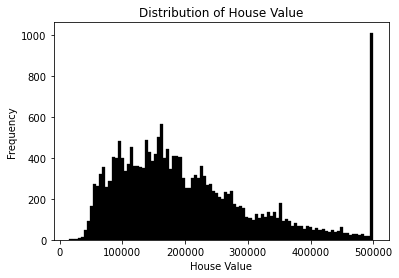

In [45]:
# Look at the median_house_value variable. Does it have a long tail?

plt.figure(figsize=(6, 4))

sns.histplot(data.median_house_value, bins=100, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('House Value')
plt.title('Distribution of House Value')

plt.show()


# Ans: Not a long tail

In [46]:
# Delete ocean_proximity per instructions from HW

del data["ocean_proximity"]

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [47]:
# Question 1: Find a feature with missing values. How many missing values does it have?

data.isnull().sum()

# Ans: 207

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [48]:
# Question 2: What's the median (50% percentile) for variable 'population'?

data['population'].median()

# Ans: 1166

1166.0

In [49]:
# Shuffle the initial dataset, use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Make sure that the target value ('median_house_value') is not in your dataframe.
# Apply the log transformation to the median_house_value variable using the np.log1p() function.

np.random.seed(42)

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_train_mean = data_shuffled.iloc[:n_train].copy()
data_val_mean = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test_mean = data_shuffled.iloc[n_train+n_val:].copy()

In [50]:
# Filling null with mean

mean_value=data_train_mean['total_bedrooms'].mean()
data_train_mean['total_bedrooms'].fillna(value=mean_value, inplace=True)
data_val_mean['total_bedrooms'].fillna(value=mean_value, inplace=True)
data_test_mean['total_bedrooms'].fillna(value=mean_value, inplace=True)

In [51]:
data_train_mean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [52]:
y_train_orig = data_train_mean.median_house_value.values
y_val_orig = data_val_mean.median_house_value.values
y_test_orig = data_test_mean.median_house_value.values

y_train = np.log1p(data_train_mean.median_house_value.values)
y_val = np.log1p(data_val_mean.median_house_value.values)
y_test = np.log1p(data_test_mean.median_house_value.values)

del data_train_mean['median_house_value']
del data_val_mean['median_house_value']
del data_test_mean['median_house_value']

# Linear Regression

In [53]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Baseline Solution with Mean

In [54]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
        'total_bedrooms', 'population', 'households', 'median_income']

In [55]:
X_train=data_train_mean.copy()
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

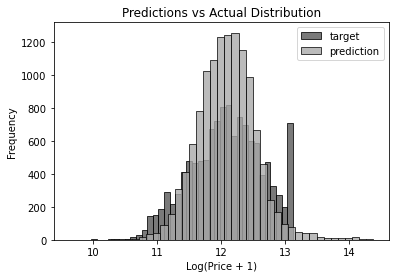

In [56]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs Actual Distribution')

plt.show()

In [57]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [58]:
rmse(y_train, y_pred)

0.341041618103281

In [59]:
X_val = data_val_mean.copy()
y_pred = w_0 + X_val.dot(w)

score = rmse(y_val, y_pred)

In [60]:
print("RMSE score with mean filled for null values is:", round(score, 2))

RMSE score with mean filled for null values is: 0.33


# Baseline Solution with 0

In [61]:
data_train_0 = data_shuffled.iloc[:n_train].copy()
data_val_0 = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test_0 = data_shuffled.iloc[n_train+n_val:].copy()

# Filling null with 0

data_train_0['total_bedrooms'] = data_train_0['total_bedrooms'].fillna(0)
data_val_0['total_bedrooms'] = data_val_0['total_bedrooms'].fillna(0)
data_test_0['total_bedrooms'] = data_test_0['total_bedrooms'].fillna(0)

In [62]:
y_train_orig = data_train_0.median_house_value.values
y_val_orig = data_val_0.median_house_value.values
y_test_orig = data_test_0.median_house_value.values

y_train = np.log1p(data_train_0.median_house_value.values)
y_val = np.log1p(data_val_0.median_house_value.values)
y_test = np.log1p(data_test_0.median_house_value.values)

del data_train_0['median_house_value']
del data_val_0['median_house_value']
del data_test_0['median_house_value']

In [63]:
X_train=data_train_0.copy()
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

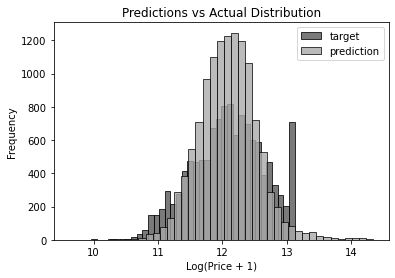

In [64]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs Actual Distribution')

plt.show()

In [65]:
rmse(y_train, y_pred)

0.34131359101566694

In [66]:
X_val = data_val_0.copy()
y_pred = w_0 + X_val.dot(w)

score = rmse(y_val, y_pred)

print("RMSE score with 0 filled for null values is:", round(score, 2))

# Answer to Q3: Both are equally good

RMSE score with 0 filled for null values is: 0.33


# Regularization

In [67]:
# Question 4:

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [68]:
for r in [0, 0.000001, 0.0001, 0.001]:
    
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
#     print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

In [69]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.34131359101566694
val 0.32953303652286803


In [70]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.34131359101568953
val 0.329533036164661


In [71]:
for r in [0, 0.000001, 0.0001, 0.001]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))
    
# Ans: Smallest r is 0

     0 0.33
 1e-06 0.33
0.0001 0.33
 0.001 0.33


# Question 5

In [72]:
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

In [73]:
data_seed=data.copy()
data_seed['total_bedrooms'] = data_seed['total_bedrooms'].fillna(0)

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_seed = dict()

for seed in seeds:

    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)

    data_shuffled = data_seed.iloc[idx]

    data_train = data_shuffled.iloc[:n_train].copy()
    data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
    data_test = data_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = data_train.median_house_value.values
    y_val_orig = data_val.median_house_value.values
    y_test_orig = data_test.median_house_value.values

    y_train = np.log1p(data_train.median_house_value.values)
    y_val = np.log1p(data_val.median_house_value.values)
    y_test = np.log1p(data_test.median_house_value.values)

    del data_train['median_house_value']
    del data_val['median_house_value']
    del data_test['median_house_value']

    X_train=data_train.copy()
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)

    X_val = data_val.copy()
    y_pred = w_0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    rmse_seed[seed] = score
    
deviation = np.std([value for value in rmse_seed.values()])
print(round(deviation, 3))

0.004


# Question 6

In [74]:
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

In [75]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data_seed.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()
data_concat=pd.concat([data_train, data_val])

# y_train_orig = data_train.median_house_value.values
# y_val_orig = data_val.median_house_value.values
y_test_orig = data_test.median_house_value.values
y_concat= data_concat.median_house_value.values

y_train = np.log1p(data_concat.median_house_value.values)
# y_val = np.log1p(data_val.median_house_value.values)
# y_concat = np.log1p(data_concat.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

del data_concat['median_house_value']
# del data_val['median_house_value']
del data_test['median_house_value']

X_train=data_concat.copy()
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

X_test = data_test.copy()
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)

print(score)



0.34531495071750284
